## 데이터셋 설명
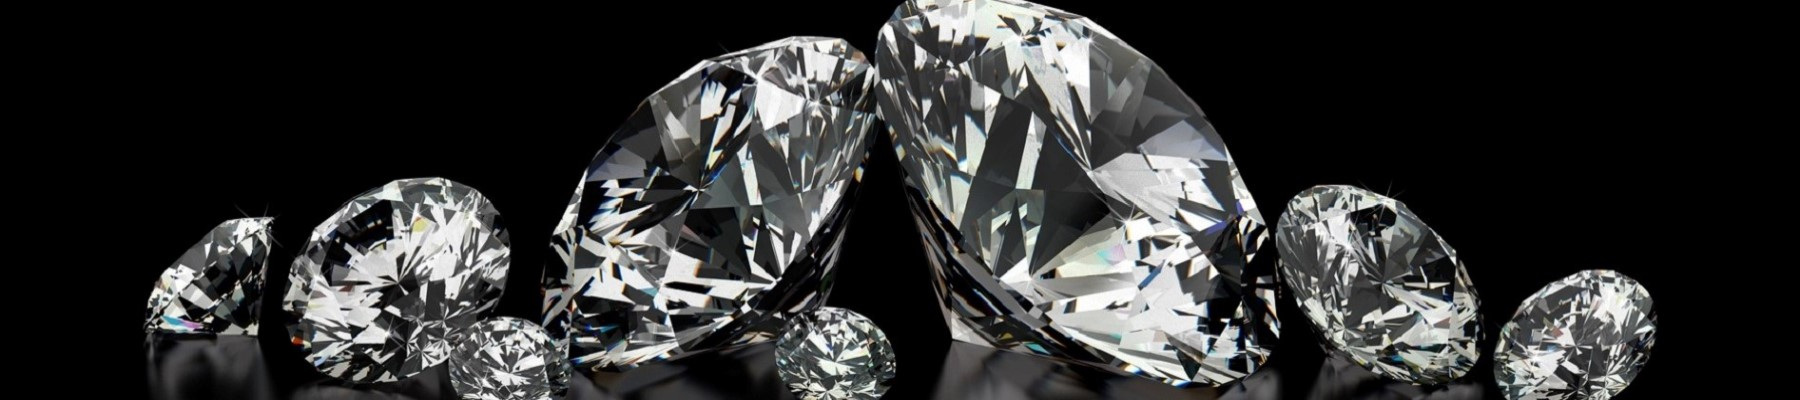

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: carat-price
* 범주형 - 수치형: cut-price
* 범주형 - 범주형: color-clarity

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형
* 귀무가설: 캐럿과 가격 간에 상관관계가 존재하지 않는다
* 대립가설: 캐럿과 가격 간에 상관관계가 존재한다

#### 시각화

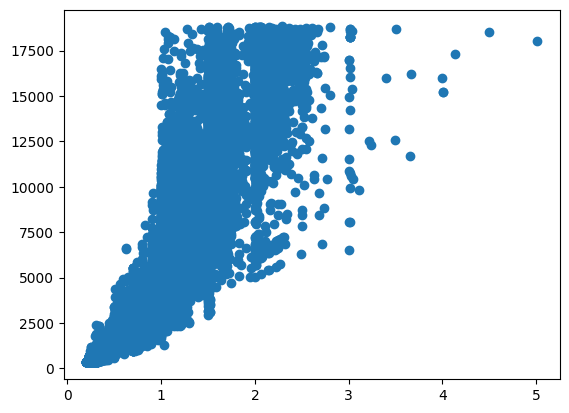

In [5]:
# 시각화 코드를 작성해주세요
import matplotlib.pyplot as plt

plt.scatter(diamonds['carat'],diamonds['price'])

#### 수치화

In [7]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst

spst.pearsonr(diamonds['carat'],diamonds['price'])

PearsonRResult(statistic=0.9215913011934769, pvalue=0.0)

p값이 0.05이하이므로 귀무가설을 기각, 가격과 캐럿 사이에는 통계적으로 유의미한 선형관계가 있음

### 범주형 - 수치형
* 귀무가설: 컷의 종류에 따른 가격 평균은 차이가 없다.
* 대립가설: 컷의 종류에 따른 가격 평균은 차이가 다.

#### 시각화

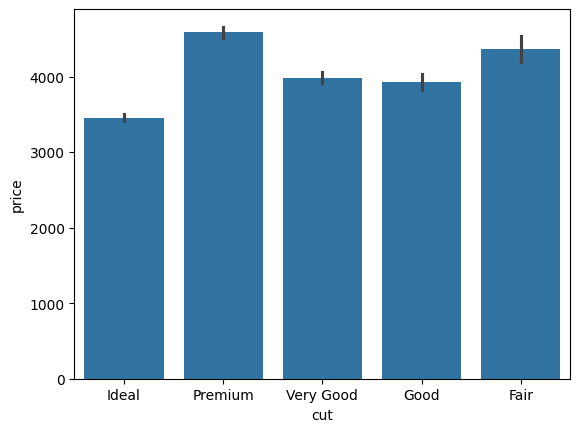

In [8]:
# 시각화 코드를 작성해주세요
sns.barplot(x='cut', y='price', data=diamonds)
plt.show()

#### 수치화

In [11]:
# 여기에 검정을 수행하는 코드를 적어주세요.
price_i=diamonds[diamonds['cut']=='Ideal']['price'].dropna()
price_p=diamonds[diamonds['cut']=='Premium']['price'].dropna()
price_v=diamonds[diamonds['cut']=='Very Good']['price'].dropna()
price_g=diamonds[diamonds['cut']=='Good']['price'].dropna()
price_f=diamonds[diamonds['cut']=='Fair']['price'].dropna()

f_value, p_value = spst.f_oneway(price_i,price_p,price_v,price_g,price_f)

print(f"F-Value: {f_value}, P-Value: {p_value}")

F-Value: 175.68871735080606, P-Value: 8.42830730759452e-150


<여기에 검정 결과를 해석해주세요>
p값이 0.05이하이므로 귀무가설을 기각, 다이아몬드의 컷에 따라 가격이 통계적으로 유의미하게 차이가 있

### 범주형 - 범주형
* 귀무가설: 다이아몬드 색상과 투명도 사이에는 관계가 없다
* 대립가설: 다이아몬드 색상과 투명도 사이에는 관계가 있다

#### 시각화


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/33/35/46c3dcd04bb6813e766ad209ac35ab6fe30d3cb426a6ce47be0b8748a1f5/statsmodels-0.14.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.1/9.8 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.8 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 

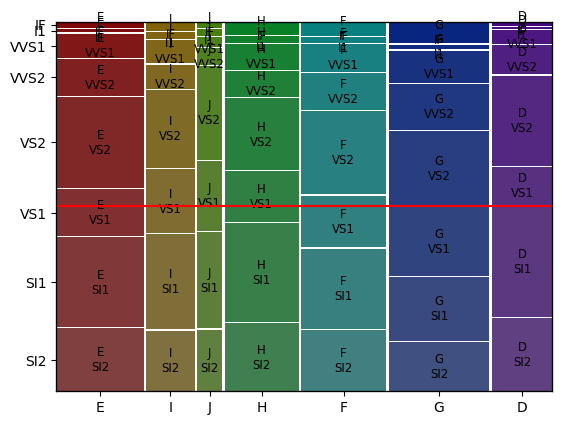

In [13]:
# 시각화 코드를 작성해주세요
!pip install statsmodels
from statsmodels.graphics.mosaicplot import mosaic
mosaic(diamonds, ['color','clarity'])
plt.axhline(0.5, color='red')
plt.show()

#### 수치화

In [15]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['color'], diamonds['clarity'])
display(table)
spst.chi2_contingency(table)

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
color,,,,,,,,
D,73,252,553,705,1697,2083,1370,42
E,158,656,991,1281,2470,2426,1713,102
F,385,734,975,1364,2201,2131,1609,143
G,681,999,1443,2148,2347,1976,1548,150
H,299,585,608,1169,1643,2275,1563,162
I,143,355,365,962,1169,1424,912,92
J,51,74,131,542,731,750,479,50


Chi2ContingencyResult(statistic=2047.0791639481317, pvalue=0.0, dof=42, expected_freq=array([[ 224.82851316,  459.07721542,  636.30237301, 1026.29820171,
        1539.63570634, 1640.99694105, 1154.78958102,   93.0714683 ],
       [ 325.11364479,  663.84936967,  920.12610308, 1484.08021876,
        2226.39276974, 2372.9663515 , 1669.88539118,  134.58615128],
       [ 316.65146459,  646.57044865,  896.17671487, 1445.45202076,
        2168.44338154, 2311.20189099, 1626.42098628,  131.08309232],
       [ 374.72525028,  765.1512792 , 1060.5352614 , 1710.54749722,
        2566.1352614 , 2735.0756396 , 1924.70611791,  155.12369299],
       [ 275.56840934,  562.68298109,  779.90478309, 1257.91590656,
        1887.10478309, 2011.34149055, 1415.40556174,  114.07608454],
       [ 179.92918057,  367.39729329,  509.22973674,  821.34152762,
        1232.16307008, 1313.28197998,  924.17256211,   74.48464961],
       [  93.18353726,  190.27141268,  263.72502781,  425.36462736,
         638.12502781,  

<여기에 검정 결과를 해석해주세요>
p값이 0.05이하이므로 귀무가설을 기각, color와 clarity 사이에 관련이 있음을 의미
chi2의 값이 7*6=42보다 크므로 그 관련 정도가 큼을 알 수 있음

고생 많으셨어요:) 회귀 세션도 화이팅!